# Autocorrelation   

### Import

In [60]:
import numpy as np
import pandas as pd
import mat4py as mpy 

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import pacf

### Variables

In [14]:
# Define the file path for the dataset
file_path = '/Users/sigurdgjerdingen/Student/Master kode/Master_Herstad-Gjerdingen/Aachen/Degradation_Prediction_Dataset_ISEA.mat'

## Loading history values 

In [ ]:
# Load the dataset
data_loader = mpy.loadmat(file_path)
df = pd.DataFrame.from_dict(data_loader["TDS"])

In [33]:
# Extract the last sequence of each cell, where the cell coloumn 
last_history = df.groupby("Cell")["History"].last()

last_history

Cell
1     [1.834012342776987, 1.8321873038112761, 1.8303...
2     [1.845058495451667, 1.8419984665415141, 1.8389...
3     [1.840036111156223, 1.8372405290428224, 1.8344...
4     [1.836350335297539, 1.8345300178698336, 1.8327...
5     [1.827606331067727, 1.8254456233245018, 1.8232...
6     [1.832208014322532, 1.830601191788663, 1.82899...
7     [1.835825928297709, 1.8339510304090747, 1.8320...
8     [1.835988407303375, 1.833727801546082, 1.83148...
9     [1.831556955767155, 1.8301691290462887, 1.8287...
10    [1.836793169988596, 1.8351719721533677, 1.8335...
11    [1.836097524050274, 1.8346486538951075, 1.8332...
12    [1.842942320101429, 1.8400569161264162, 1.8371...
13    [1.840339251322803, 1.8377590293870871, 1.8351...
14    [1.839007466704061, 1.8371484203607467, 1.8352...
15    [1.832205111009898, 1.830324272031991, 1.82845...
16    [1.834374734626181, 1.832484566869937, 1.83060...
17    [1.84180185666628, 1.8392330560748056, 1.83668...
18    [1.839492726296157, 1.837058209937162

## Autocorrelation plot

### For cell 1

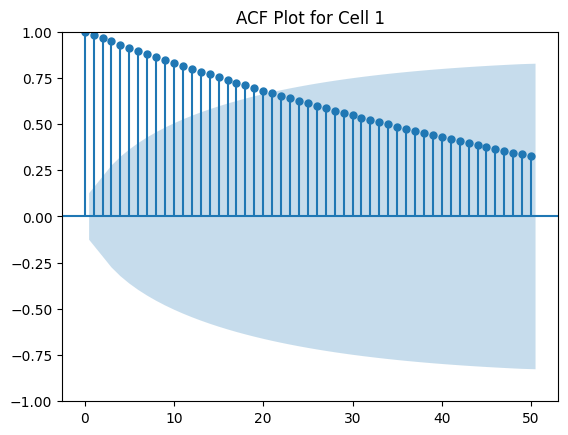

In [71]:
# Extract and plot using statsmodels
plot_acf(cell_history_list, lags=50)  # Adjust number of lags as needed
plt.title("ACF Plot for Cell 1")
plt.show()

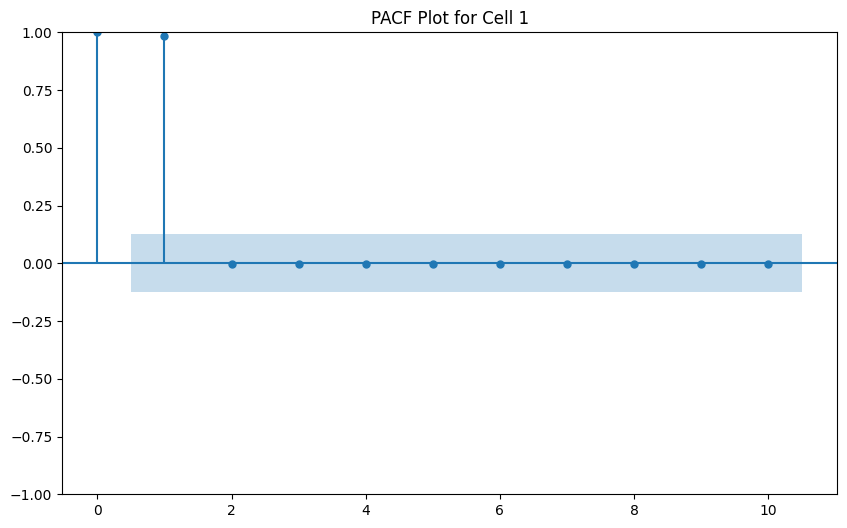

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(cell_history_list, lags=10, ax=ax, method='ywm')  # method='ywm' is a common choice
ax.set_title("PACF Plot for Cell 1")
plt.show()

## All cells

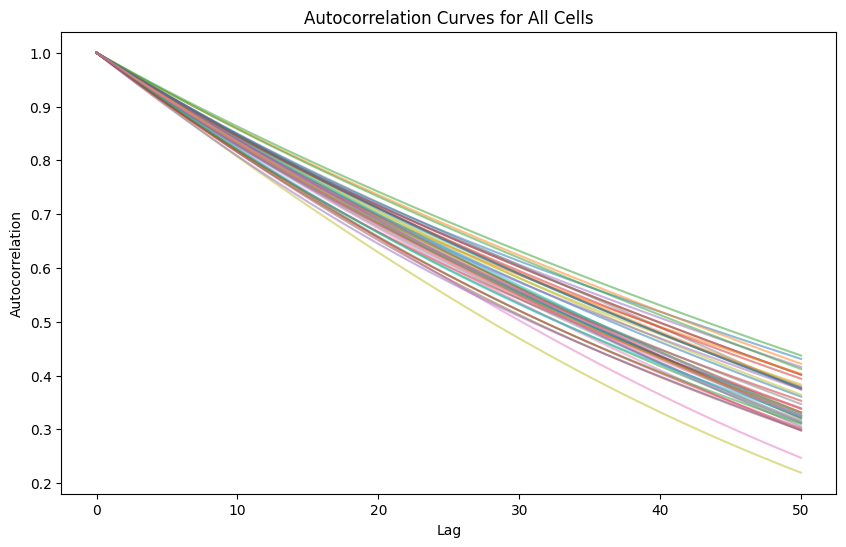

In [ ]:
max_lag = 50  # Adjust as needed

plt.figure(figsize=(10, 6))

# Assuming last_history is a DataFrame or similar with cell IDs as the index
for cell in last_history.index:
    cell_history_series = pd.Series(last_history.loc[cell])
    acf_values = acf(cell_history_series, nlags=max_lag)
    lags = np.arange(len(acf_values))
    plt.plot(lags, acf_values, alpha=0.5)  # Adjust alpha for visibility

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Curves for All Cells")
plt.show()

### Average

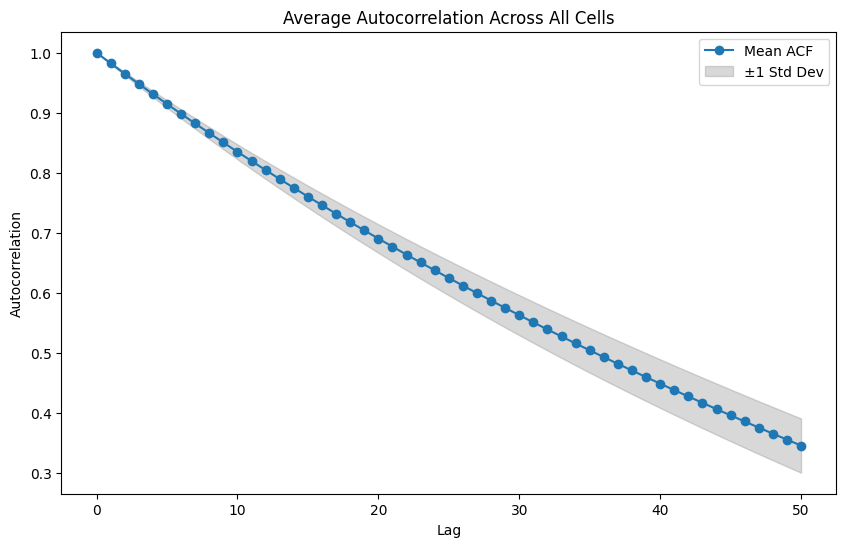

In [61]:
max_lag = 50 # Adjust as needed
all_acfs = []

for cell in last_history.index:
    cell_history_series = pd.Series(last_history.loc[cell])
    acf_values = acf(cell_history_series, nlags=max_lag)
    all_acfs.append(acf_values)

all_acfs = np.array(all_acfs)
mean_acf = np.mean(all_acfs, axis=0)
std_acf = np.std(all_acfs, axis=0)
lags = np.arange(max_lag + 1)

plt.figure(figsize=(10, 6))
plt.plot(lags, mean_acf, marker='o', label='Mean ACF')
plt.fill_between(lags, mean_acf - std_acf, mean_acf + std_acf, color='gray', alpha=0.3, label='±1 Std Dev')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Average Autocorrelation Across All Cells")
plt.legend()
plt.show()

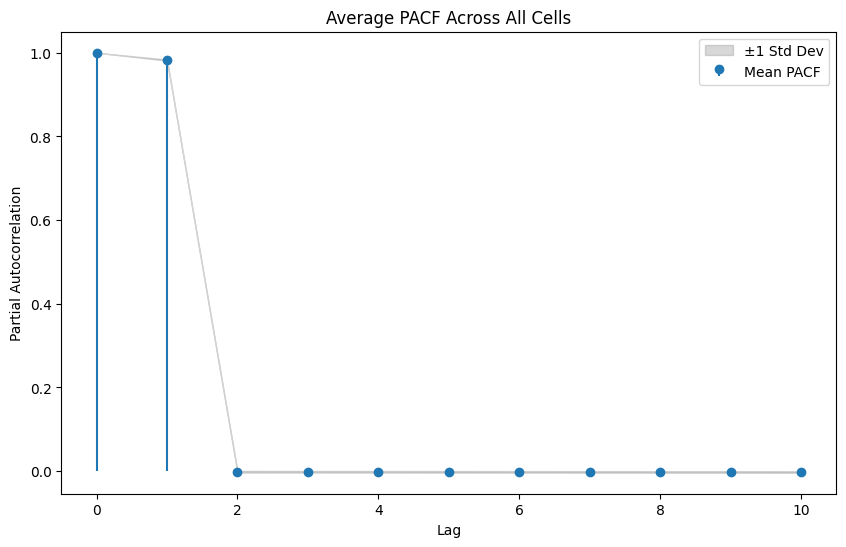

In [66]:
max_lag = 10  # Number of lags you want to consider
all_pacf_values = []  # To store PACF values for each cell

# Loop through each cell in your data structure.
# Here, we assume 'last_history' is a DataFrame with cell IDs as the index.
for cell in last_history.index:
    cell_history_list = last_history.loc[cell]
    # Convert to a Pandas Series (if not already)
    cell_history_series = pd.Series(cell_history_list)
    # Compute PACF values using the 'ywm' method
    pacf_vals = pacf(cell_history_series, nlags=max_lag, method='ywm')
    all_pacf_values.append(pacf_vals)

# Convert to a NumPy array: shape (number of cells, max_lag+1)
all_pacf_values = np.array(all_pacf_values)

# Compute the mean and standard deviation across cells for each lag
mean_pacf = np.mean(all_pacf_values, axis=0)
std_pacf = np.std(all_pacf_values, axis=0)
lags = np.arange(max_lag + 1)

# Plot the averaged PACF
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the averaged PACF using a stem plot without 'use_line_collection'
ax.stem(lags, mean_pacf, basefmt=" ", markerfmt='o', label='Mean PACF')

# Optionally, add a shaded area representing ±1 standard deviation
ax.fill_between(lags, mean_pacf - std_pacf, mean_pacf + std_pacf, color='gray', alpha=0.3, label='±1 Std Dev')

ax.set_xlabel("Lag")
ax.set_ylabel("Partial Autocorrelation")
ax.set_title("Average PACF Across All Cells")
ax.legend()
plt.show()